## Analyze time-resolved transcriptome data

In [1]:
import csv
import pandas as pd
import cPickle as pkl
%matplotlib inline

from pygenome import sg

First we get all the systematic names from `yeastgenome.org`:

In [2]:
orf_genomic_dict = pkl.load(open("../parameters/orf_coding.p"))
len(orf_genomic_dict)

5917

Some appear to be missing (expected were >6000).

Import data from Lotte:

In [3]:
filename = "../data/nostress_WT_R1.csv"
transcripts = pd.DataFrame()

with open(filename, mode='r') as infile:
    reader = csv.reader(infile, delimiter=',')
    times = [int(float(val)) for val in reader.next()[1:]]
    ntimes = len(times)
    for rows in reader:
        try:
            # convert to systematic names
            colname = rows[0] if rows[0] in orf_genomic_dict else sg.systematic_name(rows[0])
            transcript_values = pd.Series(data=[float(rows[i]) for i in range(2, ntimes + 1)])  # the time point -1 is not needed
            transcripts[colname] = transcript_values
        except:
            pass

Create row labels (time points):

In [4]:
transcripts.index = times[1:]

In [5]:
print len(transcripts.columns)

5795


Normalize to 100% for every time point:

In [6]:
transcripts_norm = (transcripts.T / transcripts.sum(axis=1)).T

In [7]:
transcripts_norm

,YAL001C,YAL002W,YAL003W,YAL005C,YAL007C,YAL008W,YAL009W,YAL010C,YAL011W,YAL012W,...,YHR214C-E,YIL156W-B,YIL134C-A,YIL105W-A,YIL102C-A,YIL046W-A,YIL014C-A,YIL002W-A,YIR018C-A,YIR021W-A
0,0.000022,0.000028,0.001257,0.002140,0.000100,0.000050,0.000039,0.000017,0.000039,0.001263,...,0,0.000066,0.000006,0.000044,0.000000,0.000017,0.000119,0.000504,0.000033,0.000000
0,0.000013,0.000043,0.001283,0.001906,0.000060,0.000060,0.000064,0.000013,0.000013,0.001620,...,0,0.000098,0.000000,0.000085,0.000000,0.000000,0.000053,0.000422,0.000023,0.000000
5,0.000055,0.000005,0.001023,0.001737,0.000065,0.000055,0.000032,0.000005,0.000032,0.001475,...,0,0.000120,0.000005,0.000032,0.000009,0.000005,0.000065,0.000461,0.000037,0.000014
10,0.000032,0.000026,0.001162,0.001507,0.000149,0.000090,0.000045,0.000006,0.000032,0.001582,...,0,0.000097,0.000000,0.000039,0.000000,0.000000,0.000039,0.000491,0.000016,0.000000
15,0.000024,0.000024,0.001246,0.001143,0.000122,0.000063,0.000049,0.000015,0.000039,0.001475,...,0,0.000151,0.000000,0.000024,0.000010,0.000000,0.000063,0.000462,0.000012,0.000015
20,0.000030,0.000021,0.001238,0.001207,0.000115,0.000043,0.000051,0.000009,0.000034,0.001328,...,0,0.000106,0.000000,0.000026,0.000017,0.000000,0.000051,0.000481,0.000009,0.000026
25,0.000031,0.000025,0.001406,0.001169,0.000107,0.000063,0.000088,0.000006,0.000013,0.001136,...,0,0.000094,0.000000,0.000075,0.000000,0.000019,0.000050,0.000420,0.000031,0.000006
30,0.000026,0.000031,0.001409,0.001306,0.000118,0.000035,0.000065,0.000017,0.000022,0.001287,...,0,0.000079,0.000004,0.000079,0.000009,0.000004,0.000059,0.000471,0.000015,0.000004
35,0.000013,0.000038,0.001463,0.001387,0.000110,0.000034,0.000051,0.000008,0.000034,0.001264,...,0,0.000123,0.000000,0.000131,0.000013,0.000000,0.000055,0.000407,0.000013,0.000021
40,0.000031,0.000023,0.001012,0.001520,0.000077,0.000023,0.000100,0.000015,0.000015,0.001228,...,0,0.000085,0.000008,0.000162,0.000000,0.000008,0.000108,0.000394,0.000008,0.000008


Test normalisation:

In [16]:
transcripts_norm.loc[60].sum()

1.0

Calculate measure of transcriptional load:

#### Attempt 1: by weighting transcript abundance with transcript length

In [17]:
orf_lengths = {prot: len(orf_genomic_dict[prot]) for prot in orf_genomic_dict}

In [18]:
tr_load_l = pd.DataFrame()

for column in transcripts_norm:
    tr_load_l[column] = transcripts_norm[column] * orf_lengths[column]

In [19]:
tr_load_l.ix[:25, :10]

,YAL001C,YAL002W,YAL003W,YAL005C,YAL007C,YAL008W,YAL009W,YAL010C,YAL011W,YAL012W
0,0.077171,0.105936,0.780834,4.127169,0.064608,0.029762,0.030244,0.024627,0.072817,1.496561
0,0.044535,0.163026,0.796682,3.677068,0.038666,0.035623,0.049867,0.018949,0.024013,1.919237
5,0.192622,0.017628,0.635352,3.349875,0.041809,0.033016,0.025163,0.006830,0.060585,1.747585
10,0.112465,0.098806,0.721867,2.906112,0.096249,0.053975,0.035260,0.009571,0.060640,1.874897
15,0.084762,0.093084,0.773761,2.205027,0.078848,0.037774,0.037964,0.021639,0.073124,1.747577
20,0.103758,0.081390,0.769050,2.329194,0.074458,0.025406,0.039833,0.012614,0.063937,1.573413
25,0.109273,0.096002,0.872825,2.255849,0.069121,0.037459,0.068519,0.009299,0.023567,1.345812


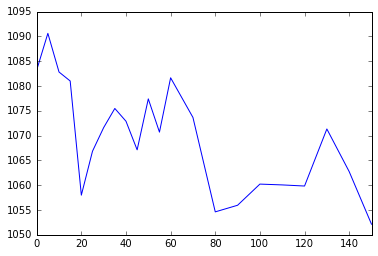

In [20]:
tr_load_l.sum(axis=1).plot()

#### Attempt 2: by weighting transcript abundance with initiation probability

In [21]:
init_probs_plotkin = pkl.load(open('../parameters/init_rates_plotkin.p'))

In [22]:
tr_load_i = pd.DataFrame()

for column in transcripts_norm:
    if column in init_probs_plotkin:
        tr_load_i[column] = transcripts_norm[column] * init_probs_plotkin[column]

In [23]:
tr_load_i.ix[:25, :10]

,YAL001C,YAL002W,YAL003W,YAL007C,YAL008W,YAL009W,YAL010C,YAL011W,YAL012W,YAL013W
0,1.684397e-11,1.064421e-11,7.522649e-09,2.017337e-10,1.507733e-10,3.036259e-11,1.700403e-11,3.775237e-11,5.673566e-09,1.083168e-10
0,9.720555e-12,1.638057e-11,7.675326e-09,1.207312e-10,1.804660e-10,5.006306e-11,1.308390e-11,1.244953e-11,7.275960e-09,1.666907e-10
5,4.204306e-11,1.771219e-12,6.121060e-09,1.305458e-10,1.672599e-10,2.526199e-11,4.715842e-12,3.141036e-11,6.625215e-09,1.401878e-10
10,2.454743e-11,9.927850e-12,6.954551e-09,3.005284e-10,2.734397e-10,3.539895e-11,6.608186e-12,3.143894e-11,7.107863e-09,8.418921e-11
15,1.850071e-11,9.352930e-12,7.454508e-09,2.461955e-10,1.913636e-10,3.811315e-11,1.494122e-11,3.791144e-11,6.625186e-09,1.480525e-10
20,2.264701e-11,8.177905e-12,7.409117e-09,2.324868e-10,1.287094e-10,3.998992e-11,8.709417e-12,3.314856e-11,5.964917e-09,2.126718e-10
25,2.385067e-11,9.646056e-12,8.408900e-09,2.158247e-10,1.897702e-10,6.878836e-11,6.420617e-12,1.221863e-11,5.102066e-09,1.226993e-10


In [24]:
len(tr_load_i.columns)

4682

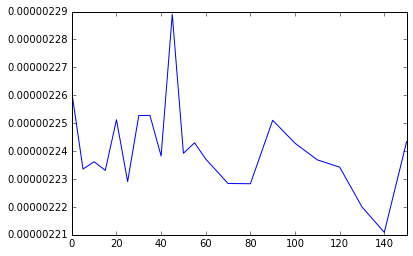

In [25]:
tr_load_i.sum(axis=1).plot()